In [1]:
# Importing necessary libraries
import pandas as pd

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Path to the CSV file
file_path = "/content/drive/MyDrive/space_missions.csv"

In [4]:
# Loading the dataset into a DataFrame with specifying encoding
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [5]:
# Displaying the first few rows of the DataFrame
df.head(3)

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure


In [7]:
# Filter for missions with mission status "Failure"
failed_missions = df[df['MissionStatus'] == 'Failure'].copy()

# Extract year from the Date column
failed_missions['Year'] = pd.to_datetime(failed_missions['Date']).dt.year

# Group by year and count the number of failed missions
failures_by_year = failed_missions.groupby('Year').size()

In [8]:
# Plotting the number of failures over the years
import matplotlib.pyplot as plt

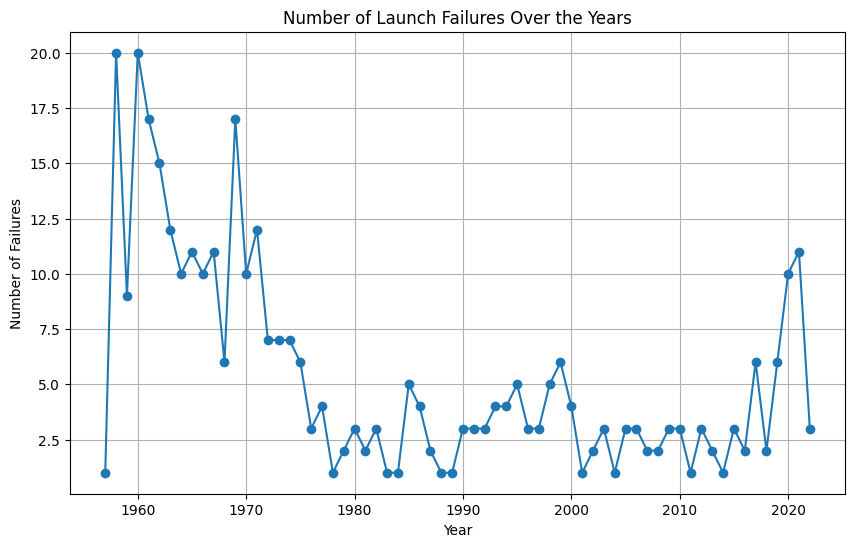

In [9]:
plt.figure(figsize=(10, 6))
failures_by_year.plot(kind='line', marker='o')
plt.title('Number of Launch Failures Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Failures')
plt.grid(True)
plt.show()

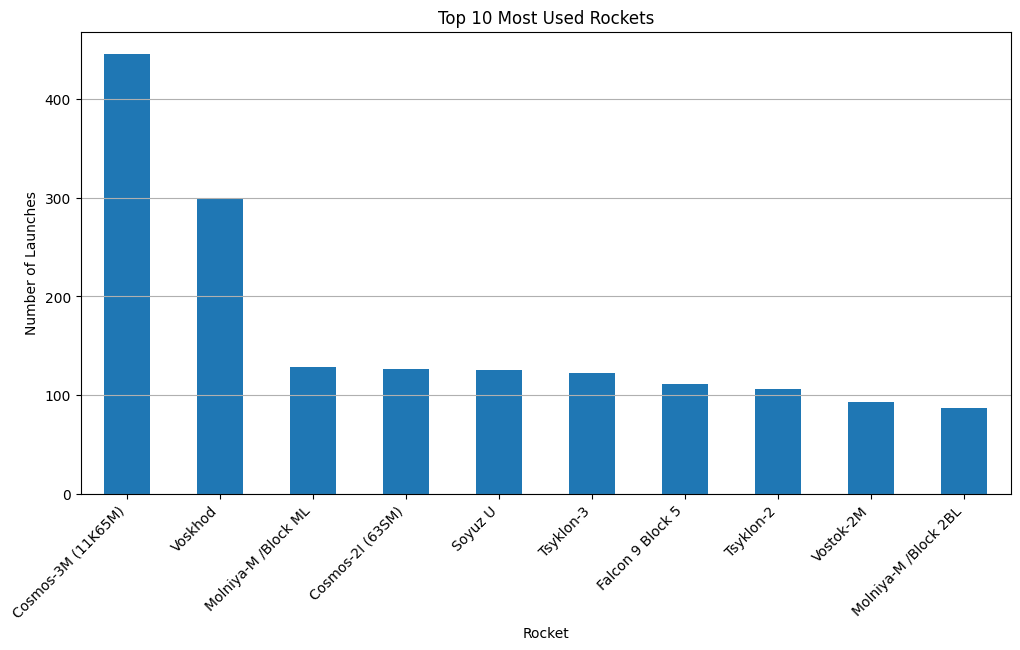

In [10]:
# Counting the occurrences of each rocket
rocket_counts = df['Rocket'].value_counts()

# Selecting the top 10 most used rockets
top_10_rockets = rocket_counts.head(10)

# Plotting the top 10 most used rockets
plt.figure(figsize=(12, 6))
top_10_rockets.plot(kind='bar')
plt.title('Top 10 Most Used Rockets')
plt.xlabel('Rocket')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

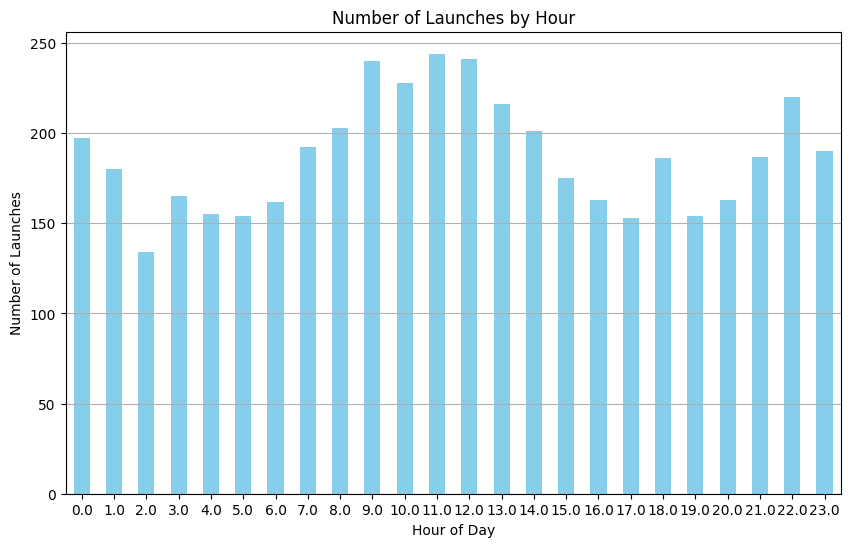

In [12]:
# Extracting the hour from the Time column
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# Counting the occurrences of launches in each hour
launches_by_hour = df['Hour'].value_counts().sort_index()

# Plotting the launches by hour
plt.figure(figsize=(10, 6))
launches_by_hour.plot(kind='bar', color='skyblue')
plt.title('Number of Launches by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Launches')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

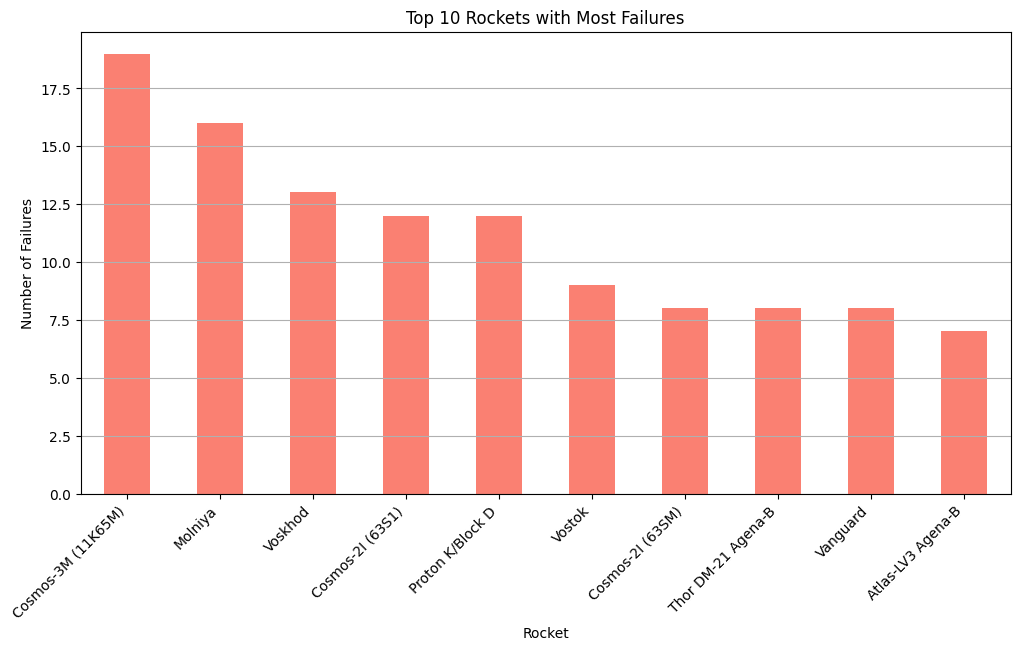

In [13]:
# Counting the number of failures for each rocket
failures_by_rocket = failed_missions['Rocket'].value_counts()

# Selecting the top 10 rockets with the most failures
top_10_failed_rockets = failures_by_rocket.head(10)

# Plotting the top 10 rockets with the most failures
plt.figure(figsize=(12, 6))
top_10_failed_rockets.plot(kind='bar', color='salmon')
plt.title('Top 10 Rockets with Most Failures')
plt.xlabel('Rocket')
plt.ylabel('Number of Failures')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

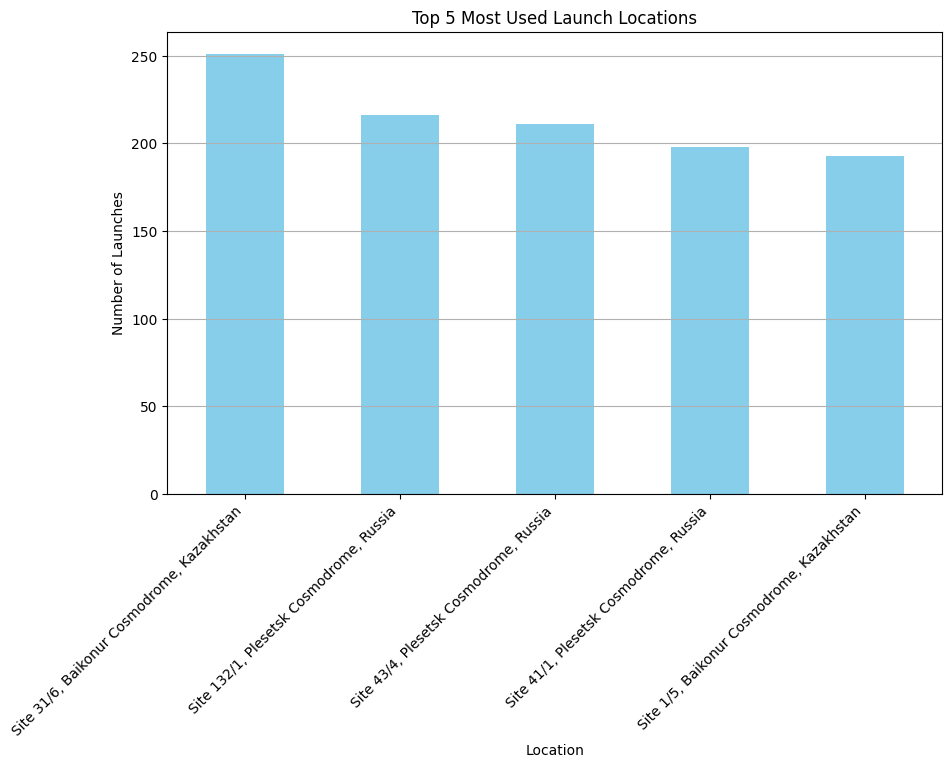

In [14]:
# Extracting the location information
locations = df['Location']

# Counting the occurrences of each location
location_counts = locations.value_counts()

# Selecting the top 5 most used locations
top_5_locations = location_counts.head(5)

# Plotting the distribution of the top 5 launch locations
plt.figure(figsize=(10, 6))
top_5_locations.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Used Launch Locations')
plt.xlabel('Location')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()